# Исследовательский вопрос + данные

Исходный набор данных был взят с ресурса [kaggle](https://www.kaggle.com/c/sberbank-russian-housing-market)

Данные содержат информацию о стоимости недвижимости в России, а также различных факторах, которые характеризуют эту недвижимость.

Всего строк: 996     
Всего столбцов: 9

Описание столбцов:
- id — идентификатор объекта (не участвует в анализе),
- timestamp — временная метка (для анализа времени преобразуем в формат даты и времени, чтобы извлечь год, месяц или тренды),
- price_sq_m — цена за квадратный метр (числовая, непрерывная переменная),
- material_monolit — бинарный признак, указывающий, построено ли здание из монолита (1) или нет (0) (бинарная, категориальная, номинальная переменная),
- green_zone_part — доля зеленой зоны в окружающем районе (числовая, непрерывная переменная),
- industrial_part — доля промышленных зон (числовая, непрерывная переменная),
- ttk_km — расстояние до ТТК (в километрах) (числовая, непрерывная переменная),
- trc_count — количество торгово-развлекательных центров поблизости (числовая, дискретная переменная).

Исходя из представленный данных сформулируем исследовательский вопрос: *Как различные факторы (доля зеленой зоны, промышленных зон, расстояние до ТТК и количество ТРЦ) влияют на цену за квадратный метр?*

In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count
0,8285,6/1/2013,150980.392157,0,0.083810,0.371149,12.755092,15
1,8394,6/7/2013,200000.000000,0,0.169625,0.019509,1.800854,39
2,8560,6/18/2013,204225.352113,0,0.297166,0.000000,6.828563,24
3,8642,6/24/2013,181818.181818,0,0.069671,0.130618,6.006677,33
4,8814,7/1/2013,196153.846154,0,0.070662,0.035145,8.955545,23


# Обработка пропусков и выбросов

Преобразуем timestamp в формат даты и времени для корректного дальнейшего анализа и удобства изучения года, месяца и дня в случае необходимости

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count
0,8285,2013-06-01,150980.392157,0,0.083810,0.371149,12.755092,15
1,8394,2013-06-07,200000.000000,0,0.169625,0.019509,1.800854,39
2,8560,2013-06-18,204225.352113,0,0.297166,0.000000,6.828563,24
3,8642,2013-06-24,181818.181818,0,0.069671,0.130618,6.006677,33
4,8814,2013-07-01,196153.846154,0,0.070662,0.035145,8.955545,23


Посмотрим на количество пропусков в данных

In [5]:
for i in df.columns:
  print(f'В столбце {i} - {df[i].isna().sum()} пропусков')

В столбце id - 0 пропусков
В столбце timestamp - 0 пропусков
В столбце price_sq_m - 0 пропусков
В столбце material_monolit - 0 пропусков
В столбце green_zone_part - 0 пропусков
В столбце industrial_part - 0 пропусков
В столбце ttk_km - 0 пропусков
В столбце trc_count - 0 пропусков


Наблюдаем, что в исходном наборе данных отсутствуют пропуски    
Если бы пропуски в данных присутствовали, то их дальнейшая обработка зависела бы от их количества. Если пропусков мало (менее 5%), то их можно просто удалить, так как их исключение не внесет большой вклад в изменение основных описательных статистик (`df[df['column_name'].notna()`). Если пропусков много, то будем их заменять на среднее / медиану в заивисмости от их распределения (`df['column_name'].fillna(df['column_name'].mean(), inplace=True)`)

Построим боксплоты для тех признаков, по которым логично искать выбросы, а именно:
- price_sq_m
- green_zone_part
- industrial_part
- ttk_km
- trc_count

<Axes: >

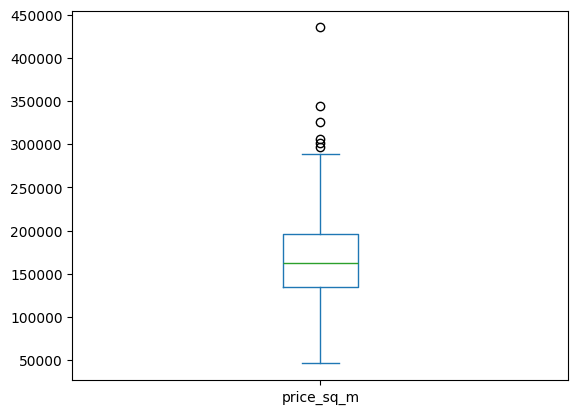

In [7]:
df['price_sq_m'].plot(kind='box')

<Axes: >

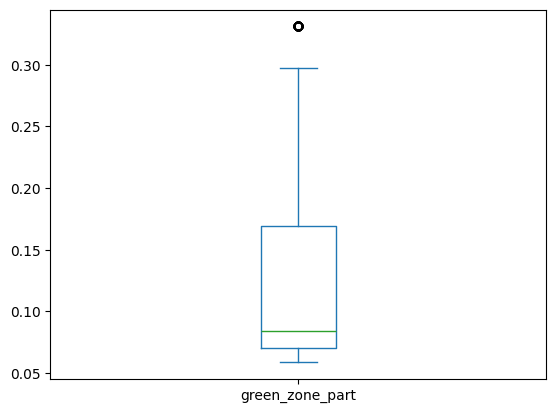

In [8]:
df['green_zone_part'].plot(kind='box')

<Axes: >

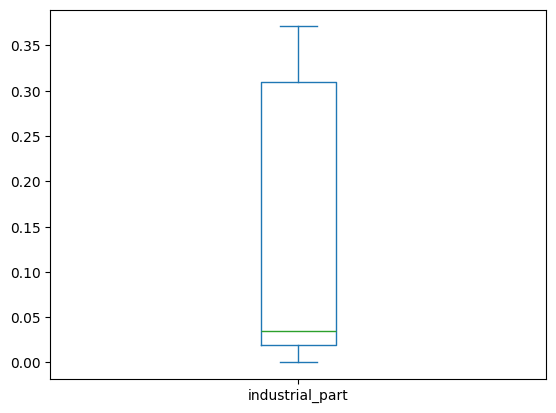

In [9]:
df['industrial_part'].plot(kind='box')

<Axes: >

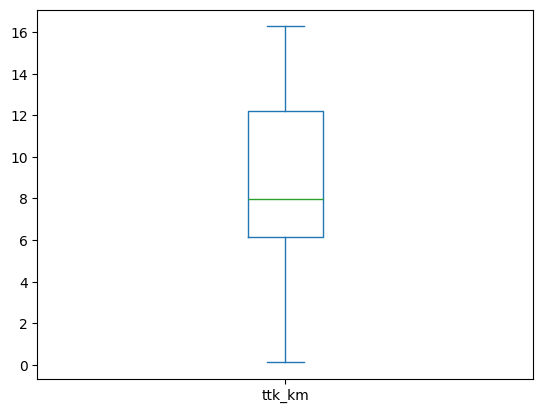

In [10]:
df['ttk_km'].plot(kind='box')

<Axes: >

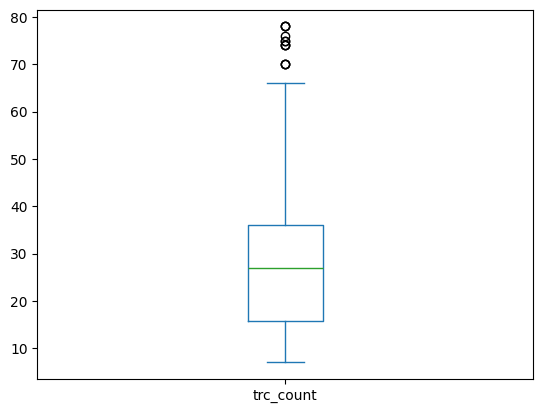

In [11]:
df['trc_count'].plot(kind='box')

Наблюдаем, что выбросы есть в переменных: price_sq_m, green_zone_part, trc_count

Вычислим их количество при помощи IQR

In [12]:
q1 = df['price_sq_m'].quantile(0.25)
q3 = df['price_sq_m'].quantile(0.75)

iqr = q3 - q1

df[(df['price_sq_m'] > q3 + 1.5*iqr) | (df['price_sq_m'] < q1 - 1.5*iqr)].shape[0]

6

In [13]:
q1 = df['green_zone_part'].quantile(0.25)
q3 = df['green_zone_part'].quantile(0.75)

iqr = q3 - q1

df[(df['green_zone_part'] > q3 + 1.5*iqr) | (df['green_zone_part'] < q1 - 1.5*iqr)].shape[0]

78

In [14]:
q1 = df['trc_count'].quantile(0.25)
q3 = df['trc_count'].quantile(0.75)

iqr = q3 - q1

df[(df['trc_count'] > q3 + 1.5*iqr) | (df['trc_count'] < q1 - 1.5*iqr)].shape[0]

12

Удалим все выбросы в данных

In [19]:
q1 = df['price_sq_m'].quantile(0.25)
q3 = df['price_sq_m'].quantile(0.75)

iqr = q3 - q1

df = df[(df['price_sq_m'] <= q3 + 1.5*iqr) & (df['price_sq_m'] >= q1 - 1.5*iqr)]

In [20]:
q1 = df['green_zone_part'].quantile(0.25)
q3 = df['green_zone_part'].quantile(0.75)

iqr = q3 - q1

df = df[(df['green_zone_part'] <= q3 + 1.5*iqr) & (df['green_zone_part'] >= q1 - 1.5*iqr)]

In [21]:
q1 = df['trc_count'].quantile(0.25)
q3 = df['trc_count'].quantile(0.75)

iqr = q3 - q1

df = df[(df['trc_count'] <= q3 + 1.5*iqr) & (df['trc_count'] >= q1 - 1.5*iqr)]

Убедимся, что выбросы пропали

In [22]:
for i in ['price_sq_m', 'green_zone_part', 'trc_count']:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)

  iqr = q3 - q1

  print(f'Столбец: {i}. Пропусков: {df[(df[i] > q3 + 1.5*iqr) | (df[i] < q1 - 1.5*iqr)].shape[0]}')

Столбец: price_sq_m. Пропусков: 0
Столбец: green_zone_part. Пропусков: 0
Столбец: trc_count. Пропусков: 0


# Описательные статистики

Перед рассчетом статистик разделим дату на год, месяц, день для вычисления мод в соответствующих категориях (по месяцу и году)

In [23]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count,year,month,day
0,8285,2013-06-01,150980.392157,0,0.083810,0.371149,12.755092,15,2013,6,1
1,8394,2013-06-07,200000.000000,0,0.169625,0.019509,1.800854,39,2013,6,7
2,8560,2013-06-18,204225.352113,0,0.297166,0.000000,6.828563,24,2013,6,18
3,8642,2013-06-24,181818.181818,0,0.069671,0.130618,6.006677,33,2013,6,24
4,8814,2013-07-01,196153.846154,0,0.070662,0.035145,8.955545,23,2013,7,1


In [25]:
print(f'Среднее по price_sq_m:', df['price_sq_m'].mean())
print(f'Медиана по price_sq_m:', df['price_sq_m'].median())
print(f'Размах по price_sq_m:', df['price_sq_m'].max() - df['price_sq_m'].min())

Среднее по price_sq_m: 161803.23575207475
Медиана по price_sq_m: 160526.315789474
Размах по price_sq_m: 239550.64935064956


Цены за квадратный метр в данных относительно стабильны, так как среднее и медиана близки друг к другу. Размах показывает широкий разброс цен, что может быть связано с различиями в характеристиках объектов (например, местоположение, тип здания).

In [26]:
print(f'Среднее по green_zone_part:', df['green_zone_part'].mean())
print(f'Медиана по green_zone_part:', df['green_zone_part'].median())
print(f'Размах по green_zone_part:', df['green_zone_part'].max() - df['green_zone_part'].min())

Среднее по green_zone_part: 0.11910600385082874
Медиана по green_zone_part: 0.083809588
Размах по green_zone_part: 0.238623288


Распределение доли зеленой зоны, скорее всего, асимметрично, с уклоном в сторону районов с небольшой зеленой зоной, но с отдельными районами с большой долей зеленых территорий. Размах подтверждает разнообразие районов: они варьируются от почти лишенных зелени до достаточно зеленых. Разница между средним и медианой предполагает наличие нескольких "зелёных" районов, которые сильно поднимают среднее значение.

In [27]:
print(f'Среднее по industrial_part:', df['industrial_part'].mean())
print(f'Медиана по industrial_part:', df['industrial_part'].median())
print(f'Размах по industrial_part:', df['industrial_part'].max() - df['industrial_part'].min())

Среднее по industrial_part: 0.16045896894364642
Медиана по industrial_part: 0.130617806
Размах по industrial_part: 0.371148999


Распределение асимметрично, с уклоном в сторону меньших значений (большинство районов имеют относительно небольшую долю промышленности, но есть некоторые районы с высокой долей). Большой размах указывает на значительное разнообразие: есть как районы практически без промышленности, так и районы с очень высокой концентрацией

In [31]:
print(f'Среднее по ttk_km:', df['ttk_km'].mean())
print(f'Медиана по ttk_km:', df['ttk_km'].median())
print(f'Размах по ttk_km:', df['ttk_km'].max() - df['ttk_km'].min())

Среднее по ttk_km: 8.61755450319558
Медиана по ttk_km: 7.913335116
Размах по ttk_km: 16.174755154


Распределение расстояний несимметрично, с уклоном в сторону меньших значений (многие объекты находятся ближе к ТТК). Большой размах подчеркивает разнообразие объектов: включены как центральные, так и периферийные районы. Среднее значение может быть смещено вверх из-за нескольких удаленных объектов, поэтому медиана лучше отражает "типичное" расстояние

In [29]:
df['material_monolit'].mode()

,material_monolit
0,0


In [30]:
df['material_monolit'].value_counts()

,count
material_monolit,
0,851
1,54


Чаще всего встречаются не монолитные дома

In [32]:
print(f'Среднее по trc_count:', df['trc_count'].mean())
print(f'Медиана по trc_count:', df['trc_count'].median())
print(f'Мода по trc_count:', df['trc_count'].mode()[0])

Среднее по trc_count: 25.678453038674032
Медиана по trc_count: 27.0
Мода по trc_count: 15


In [33]:
df['year'].mode()[0]

2014

In [35]:
df['year'].value_counts()

,count
year,
2014,589
2013,165
2015,151


In [34]:
df['month'].mode()[0]

4

In [36]:
df['month'].value_counts()

,count
month,
4,117
12,116
11,85
5,85
2,84
6,83
3,80
10,63
1,55


In [37]:
df['day'].mode()[0]

20

In [38]:
df['day'].value_counts()

,count
day,
20,44
27,38
18,36
11,35
25,34
28,34
23,34
6,34
17,33
